# DESAFIO 1 - GRUPO 5

Integrantes: Carolina Villa - Manuel Casella - Joaquin Vera - Guido Delfino - Martín Munoa - Fabricio Neyra

Análisis exploratorio de un dataset de precios de propiedades


Objetivos:

    ● Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar
      estrategias para lidiar con los datos perdidos en ciertas variables.
      
    ● Realizar un análisis descriptivo de las principales variables.
    
    ● Crear nuevas columnas a partir de las características dadas que puedan tener valor
      predictivo.

# Índice:

[Importación de librerías](#section_librerias)

[Importación y exploración inicial del dataset](#section_dataset) 

[Lineamientos de trabajo](#section_lineamientos)

[Filtro de dataset por property_type](#section_apartment)

[Depuración de columnas place_name, place_with_parent_names, country_name y state_name](#section_place)

[Mapa interactivo de Properati](#section_map)

[Analisis exploratorio de la columna "description"](#section_description)

[Depuración de columnas price, currency, price_aprox_local_currency, price_aprox_usd](#section_price)

[Depuración de columnas surface_total_in_m2 y surface_covered_in_m2](#section_m2)

[Depuración Price_usd_per_m2](#section_m2price)

[Depuración de columna floor](#section_floor)

[Depuración de columna expenses](#section_expenses)

[Nueva información a partir de la columna description](#section_nuevos_datos)

[Análisis final del dataset](#section_analisis_final)


<a id="section_librerias"></a> 

# Importación de librerías


In [1]:
conda install folium -c conda-forge

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda




In [22]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import folium
import warnings
warnings.filterwarnings('ignore')


_________________________________________________________________________________________________________

<a id="section_dataset"></a> 

# Importación y exploración inicial del dataset

Importamos el dataset "properati.csv". Para eso utilizamos el método read_csv.
Luego analizamos la cantidad de filas, las columnas y el tipo de datos de cada una de ellas. Además, visualizamos cantidad de nulos por columna en el gráfico de barras

.

In [23]:
data=pd.read_csv("..\Data\properati.csv")
print (data.info())
data.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  121220 non-null  int64  
 1   operation                   121220 non-null  object 
 2   property_type               121220 non-null  object 
 3   place_name                  121197 non-null  object 
 4   place_with_parent_names     121220 non-null  object 
 5   country_name                121220 non-null  object 
 6   state_name                  121220 non-null  object 
 7   geonames_id                 102503 non-null  float64
 8   lat-lon                     69670 non-null   object 
 9   lat                         69670 non-null   float64
 10  lon                         69670 non-null   float64
 11  price                       100810 non-null  float64
 12  currency                    100809 non-null  object 
 13  price_aprox_lo

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...



###  Properati Data Set - Features

**0   Unnamed:  0**                 Id de registros de la base de datos de Properati         

**1   operation**          Contempla la operación realizada con el inmueble: venta, compra, etc.

**2   property_type**               Categorías de propiedades con las que trabaja Properati: casas, departamentos, locales y PH

**3   place_name**                  Zona de la ciudad donde se ubica el inmueble 

**4   place_with_parent_names**     Concatenado de Pais, Zona, Ciudad, Barrio

**5   country_name**                Nombre del País donde se ubica el inmueble

**6   state_name**                  Ciudad donde se ubica la propiedad

**7   geonames_id**                 Id geográfico del inmueble como parte de una base de datos global

**8   lat-lon**                     Ubicación por latitud + longitud

**9   lat**                         Coordenada geográfica respectiva a la latitud del inmueble

**10  lon**                         Coordenada geográfica respectiva a la longitud del inmueble

**11  price**                       Precio de tabla del inmueble

**12  currency**                    Moneda del Precio de Tabla

**13  price_aprox_local_currency**  Precio aproximado según moneda local (ARG)

**14  price_aprox_usd**             Precio aproximado en dólares

**15  surface_total_in_m2**         Superficie total en m2 -terreno + edificación

**16  surface_covered_in_m2**       Superficie cubierta en m2 por el inmueble

**17  price_usd_per_m2**            Precio en dólares por m2

**18  price_per_m2**                Precio en moneda local por m20

**19  floor**                       Piso del inmueble incluyendo planta baja

**20  rooms**                       Cantidad de ambientes de la propiedad

**21  expenses**                    Valor de expensas según tipo de propiedad

**22  properati_url**               Direccion Web de la Propiedad

**23  description**                 Descripción de la Publicación

**24  title**                       Título de la Publicación

**25  image_thumbnail**             Imagen del Inmueble publicada en la Web de Properati

* Vamos a ver también si hay filas con datos repetidos en todos los campos entre si, para eliminar duplicados y solo dejar cada fila una vez. Dejamos la última repetición porque aparenta ser la última publicación realizada (Aunque no hay fechas), y entonces refleja mas el valor real con el que la propiedad fue comercializada (Suponiendo que fue vendida luego de la última publicación)

In [24]:
columnas = ["place_name",
"place_with_parent_names",
"country_name",
"state_name",
"geonames_id",
"lat-lon",
"lat",
"lon",                     
"currency",                              
"surface_total_in_m2",        
"surface_covered_in_m2",         
"floor",   
"rooms",  
"expenses",  
"description", 
"title"]

shape_inicial = data.shape[0]
data = data.drop_duplicates(subset = columnas , keep = "last")
duplicados = shape_inicial - data.shape[0]
print("Verificamos que hay %s filas duplicadas" % duplicados)

Verificamos que hay 7944 filas duplicadas


* Explorando en detalle la columna "property_type" observamos que tenemos 4 tipo de propiedades distintas.

In [25]:
data['property_type'].value_counts()

apartment    63842
house        39723
PH            5644
store         4067
Name: property_type, dtype: int64

* Explorando en detalle la columna "operation" vemos que todas contienen el mismo valor, con lo cual ningún dato aporta valor. Todos los registros son operaciones de venta. Además, la columna "Unnamed: 0" refiere a un índice antiguo del dataset y tampoco aporta valor. Por estas razones, decidimos eliminar ambas columnas.

In [26]:
data['operation'].value_counts()

sell    113276
Name: operation, dtype: int64

In [27]:
data = data.drop(['operation',"Unnamed: 0"], axis = 1)
data.head(2)

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15bob_venta_depart...,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...


Continuamos evaluando el contenido de las distintas columnas para conocer el dataset

In [28]:
data['state_name'].value_counts()

Capital Federal                 29325
Bs.As. G.B.A. Zona Norte        24445
Bs.As. G.B.A. Zona Sur          13386
Córdoba                         11252
Buenos Aires Costa Atlántica     9864
Bs.As. G.B.A. Zona Oeste         8966
Santa Fe                         8617
Buenos Aires Interior            2243
Río Negro                         782
Tucumán                           631
Mendoza                           623
Neuquén                           586
Corrientes                        563
Misiones                          454
Entre Ríos                        365
Salta                             276
Chubut                            259
San Luis                          245
La Pampa                          153
Chaco                              57
San Juan                           40
Formosa                            32
Tierra Del Fuego                   31
Catamarca                          27
Jujuy                              26
Santa Cruz                         20
Santiago Del

In [29]:
data['currency'].value_counts()

USD    84095
ARS    11622
PEN        2
UYU        1
Name: currency, dtype: int64

Al evaluar otras columnas como "expense" o "surface_covered_in_m2" observamos que hay valores poco realistas 

In [30]:
print("el mínimo valor de expensas es %s y carece de sentido" % data['expenses'].min())
print("el máximo valor de expensas es %s y carece de sentido" % data['expenses'].max())
print("el mínimo valor de m2 es %s y carece de sentido \n" % data[data['surface_covered_in_m2'].notnull()]['surface_covered_in_m2'].min())


el mínimo valor de expensas es 1.0 y carece de sentido
el máximo valor de expensas es 10001500.0 y carece de sentido
el mínimo valor de m2 es 0.0 y carece de sentido 



_________________________________________________________________________________________________________

<a id="section_lineamientos"></a> 

# Lineamientos de trabajo

1) Vamos a trabajar sobre la categoría de `property_type` "apartment" y las propiedades de `state_name` "Capital Federal".

2) Buscaremos imputar registros faltantes a partir de la información existente en otras columnas de las que si se pueda extraer datos.

3) Clasificar el inmueble según cantidad de comodidades / amenities a partir de datos obtenidos en el campo "description".

4) Buscaremos conocer como distribuyen por tamaño (m2) y precio en USD las propiedades del tipo "apartment" en las distintos barrios.

5) Buscaremos alguna correlación entre amenities y el precio en USD por m2, por barrio.

.

_________________________________________________________________________________________________________

<a id="section_apartment"></a> 

# Filtro de dataset por property_type

Acotamos el dataset a aquellos cuyo `property_type` es "apartment" y `state_name` es "Capital Federal"

In [11]:
data_ap = data.loc[(data['property_type'] == "apartment")&(data['state_name']=='Capital Federal'),:]
print(data_ap.info())
print(" \n El dataset reducido a departamentos de CABA contiene %s filas" % data_ap.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24163 entries, 2 to 121219
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   property_type               24163 non-null  object 
 1   place_name                  24163 non-null  object 
 2   place_with_parent_names     24163 non-null  object 
 3   country_name                24163 non-null  object 
 4   state_name                  24163 non-null  object 
 5   geonames_id                 23165 non-null  float64
 6   lat-lon                     18084 non-null  object 
 7   lat                         18084 non-null  float64
 8   lon                         18084 non-null  float64
 9   price                       22136 non-null  float64
 10  currency                    22136 non-null  object 
 11  price_aprox_local_currency  22136 non-null  float64
 12  price_aprox_usd             22136 non-null  float64
 13  surface_total_in_m2         19

In [12]:
data_ap[data_ap['place_name'].isnull()]

,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail


_________________________________________________________________________________________________________

<a id="section_place"></a>

# Depuración de columnas place_name, place_with_parent_names, country_name y state_name     


Creación columnas `Pais`, `Provincia` y `Barrio`

In [31]:
divisor = data_ap.place_with_parent_names.str.split('|',expand=True).iloc[:,1:4].rename(
    columns={1: 'Pais', 2: 'Provincia',3:'Barrio'})
data_frame_para_unir = [data_ap,divisor]
data_ap = pd.concat(data_frame_para_unir,axis=1, sort=False)
data_ap = data_ap.drop(["place_name","country_name","state_name"],axis=1)


KeyError: "['place_name' 'country_name' 'state_name'] not found in axis"

In [ ]:
serie_barrios=data_ap['Barrio'].value_counts()
serie_barrios

    Vemos que tenemos 482 registros sin barrio asignado, para el análisis no los vamos a tener en cuenta

_________________________________________________________________________________________________________

<a id="section_map"></a>

# Mapa Interactivo de Properati

Con el fin de aprovechar los datos de geolocalización presentes en el dataset, generamos el siguiente mapa con algunos de los registros a modo de ejemplo utilizando la librería "Folium"

In [15]:
lat_lon_serie = data_ap['lat-lon']

In [16]:
lat_lon_serie_not_null = lat_lon_serie[lat_lon_serie.notnull()]
lat_lon_serie_not_null

2               -34.6522615,-58.5229825
7                -34.5598729,-58.443362
8                -34.5598729,-58.443362
19         -34.580503566,-58.4058744847
21               -34.590926,-58.4116653
                      ...              
121152      -34.623443168,-58.455030181
121153    -34.5992135511,-58.4025191971
121158     -34.587425443,-58.3973722534
121209     -34.563685346,-58.4426825896
121217    -34.5706388726,-58.4755963355
Name: lat-lon, Length: 18084, dtype: object

In [17]:
lat_lon_serie_not_null[lat_lon_serie_not_null==0]

Series([], Name: lat-lon, dtype: object)

In [18]:
#Generamos el mapa

map_test = folium.Map(location=[-34.6522615,-58.5229825])
tooltip = 'Ver coordenadas'

In [19]:
#Generamos una función que asigne las distintas posiciones geográficas en el mapa 
def mapeo (serie):
    for x in serie.index:
        mapa=folium.Marker(serie.loc[x].split(","),popup='<i>Properati</i>',tooltip=tooltip).add_to(map_test)
    return mapa

In [20]:
#Seleccionamos una serie de puntos de coordenadas a modo de ejemplo

mapeo(lat_lon_serie_not_null.loc[1:1000])

In [21]:
map_test

El mapa se puede guardar en formato html para abrirlo en un browser

In [24]:
map_test.save('map_test.html')

_________________________________________________________________________________________________________

<a id="section_description"></a>
# Analisis exploratorio de la columna "description"

Vamos a analizar el contenido de las palabras que contienen los resgistros de la columna "description". De esta manera tendremos una mejor perspectiva de la información alojada en esta variable.

In [32]:
### Le eliminamos los tildes de la descripción y pasamos a minusculas
data_ap['description_sin_tilde']=data_ap['description'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].str.lower()
data_ap[['description','description_sin_tilde']].head(10)

,description,description_sin_tilde
2,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 ambientes 3er piso lateral living comedor am...
7,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,excelente monoambiente a estrenar amplio super...
8,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,excelente dos ambientes estrenar amplio super...
13,Torre I Mondrian. 3 ambientes con terraza y d...,torre i mondrian. 3 ambientes con terraza y d...
14,Torre II Dalí. Ambiente unico divisible.Vitrau...,torre ii dali. ambiente unico divisible.vitrau...
19,Excelente semipiso al contra frente en Bulnes ...,excelente semipiso al contra frente en bulnes ...
21,"EXCELENTE ZONA, MULTIPLES MEDIOS DE TRANSPORTE...","excelente zona, multiples medios de transporte..."
29,Departamento muy luminoso con todos sus ambien...,departamento muy luminoso con todos sus ambien...
38,"Espectacular loft de exclusivo diseño, 210 ms,...","espectacular loft de exclusivo diseno, 210 ms,..."
48,"PISO 13, Orientación norte, disposición al fre...","piso 13, orientacion norte, disposicion al fre..."


In [33]:
patron = re.compile("\w+")
mascara = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron.findall(x))
listado = [x for l in mascara[mascara.notnull()] for x in l]


palabras = pd.DataFrame(listado)

#Excluímos conectores y palabras de menor utilidad
exclusion_2 = ["son","c","no","cuenta", "sobre","publicado","cuadras","barrio","zona","gran","calidad","principal","propiedades","alta","unidades","todos","no","dormitorios","departamento","piso","completo","uno","diario","agua","planta","casa", "lote", "estar", "tiene", "san", "bajo","cocheras","u","su","s", "es", "amplio","venta", "x","que","muy","dos","o","se","y","con","de", "en", "el", "la", "a", "un", "del", "una", "los", "las", "para", "por", "al", "1" , "2", "3", "4", "5", "6", "7", "8", "9"]
final = palabras[~palabras.isin(exclusion_2)]
print ("El recuento de palabras en description es: \n")
final[0].value_counts().head(50)

El recuento de palabras en description es: 



cocina         19497
ambientes      17349
bano           15150
balcon         14687
edificio       13410
comedor        13328
pisos          11541
living         11210
av             10446
frente         10358
excelente       8537
dormitorio      8193
expensas        7206
m2              7040
placard         6587
apto            6382
luminoso        6300
lavadero        6225
medidas         6070
terraza         5632
cochera         5597
parrilla        5525
servicio        5193
ubicacion       5105
ubicado         5087
solarium        5062
subte           5030
vista           4940
sum             4930
aire            4741
amenities       4698
cucicba         4698
suite           4652
acceso          4504
toilette        4424
este            4393
esta            4347
metros          4237
mesada          4191
mas             4141
b               4120
seguridad       4110
ambiente        4104
profesional     4066
15              4039
banos           3991
hall            3989
linea        

<a id="section_price"></a>

# Depuración de columnas price, currency, price_aprox_local_currency, price_aprox_usd

En primer lugar buscamos comprender qué feature es la correcta a conservar. Creemos que lo conveniente es utilizar la columna price_aprox_usd como base e intentar imputar los valores nulos de las features "Titulo" y/o "Descripcion".

In [35]:
data_price_nulls= data_ap[data_ap.price.isnull()]
data_price_nulls[['price','price_aprox_local_currency','price_aprox_usd','currency']]

,price,price_aprox_local_currency,price_aprox_usd,currency
214,NaN,NaN,NaN,NaN
217,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN
545,NaN,NaN,NaN,NaN
546,NaN,NaN,NaN,NaN
...,...,...,...,...
121047,NaN,NaN,NaN,NaN
121049,NaN,NaN,NaN,NaN
121050,NaN,NaN,NaN,NaN
121051,NaN,NaN,NaN,NaN


#### Obs: para lo que es la currency existe un valor nulo adicional (20411)

### Patrón RegEx para buscar precio en Title / Description 

In [36]:
#Buscamos en la columna Descripcion inicialmente:
patron_null_price = "USD ?\d+\.?\d+|U\$D ?\d+\.?\d+|\$ ?\d+\.?\d+"
regex_null_price = re.compile(patron_null_price,flags=re.I)
resultado_price_description = data_ap["description_sin_tilde"].apply(lambda x: x if x is np.NaN else regex_null_price.search(x))

In [37]:
resultado_price_description_notnull = resultado_price_description.notnull()
print('Se encontraron: ',resultado_price_description[resultado_price_description_notnull].shape[0],
     'precios en la decripción únicamente')

Se encontraron:  5290 precios en la decripción únicamente


In [38]:
#Agreagamos la columna con los findings:
resultado_price_description_notnull = resultado_price_description.notnull()
data_ap.loc[resultado_price_description_notnull, "Description_Prices"] = resultado_price_description[resultado_price_description_notnull].apply(lambda x: x.group(0))

In [39]:
#Ahora lo repetimos pero trabajando con la columna Titulo
resultado_price_title =  data_ap["title"].apply(lambda x: x if x is np.NaN else regex_null_price.search(x))

In [40]:
resultado_price_title_notnull = resultado_price_title.notnull()
print('Se encontraron: ',resultado_price_title[resultado_price_title_notnull].shape[0],
     'precios en los titulos')

Se encontraron:  693 precios en los titulos


In [41]:
#Nuevamente agreagamos la columna respectiva para el posterior análisis:
resultado_price_title_notnull = resultado_price_title.notnull()
data_ap.loc[resultado_price_title_notnull, "title_price"] = resultado_price_title[resultado_price_title_notnull].apply(lambda x: x.group(0))

In [42]:
price_df=data_ap[['price','price_aprox_local_currency','price_aprox_usd','currency','Description_Prices','title_price']]
price_df_nulls=price_df[price_df.price_aprox_usd.isnull()]

In [43]:
price_df_nulls.notnull().sum()

price                           0
price_aprox_local_currency      0
price_aprox_usd                 0
currency                        0
Description_Prices            147
title_price                   164
dtype: int64

#### Obs: con la sentencia anterior vemos efectivamente la cantidad de precios que se van a poder imputar

In [44]:
#Reemplazamos los precios en USD:
data_ap.loc[(data_ap['Description_Prices'].notnull()) & (data_ap['Description_Prices'].str.contains('USD')), 
            'Description_Prices' ] = data_ap[(data_ap['Description_Prices'].notnull()) & 
                                             (data_ap['Description_Prices'].str.contains('USD'))]\
                                            ['Description_Prices'].apply(lambda x: x.replace('USD','').replace('.','')
                                                                        ).astype(float)

In [45]:
#Repetimos para U$D:
data_ap.loc[(data_ap['Description_Prices'].notnull()) & (data_ap['Description_Prices'].str.contains('U$D')), 
            'Description_Prices' ] = data_ap[(data_ap['Description_Prices'].notnull()) & 
                                             (data_ap['Description_Prices'].str.contains('U$D'))]\
                                            ['Description_Prices'].apply(lambda x: x.replace('U$D','').replace('.','')
                                                                        ).astype(float)

In [46]:
#Repetimos para usd:
data_ap.loc[(data_ap['Description_Prices'].notnull()) & (data_ap['Description_Prices'].str.contains('usd')), 
            'Description_Prices' ] = data_ap[(data_ap['Description_Prices'].notnull()) & 
                                             (data_ap['Description_Prices'].str.contains('usd'))]\
                                            ['Description_Prices'].apply(lambda x: x.replace('usd','').replace('.','')
                                                                        ).astype(float)

In [47]:
#Repetimos para u$d:
data_ap.loc[(data_ap['Description_Prices'].notnull()) & (data_ap['Description_Prices'].str.contains('u\$d')), 
            'Description_Prices' ] = data_ap[(data_ap['Description_Prices'].notnull()) & 
                                             (data_ap['Description_Prices'].str.contains('u\$d'))]\
                                            ['Description_Prices'].apply(lambda x: x.replace('u$d','')
                                                                         .replace('.','')
                                                                        ).astype(float)

In [48]:
#Buscamos las columnas con el precio en moneda local (pesos args) y en dolares (usd)
tipo_de_cambio = data_ap.loc[data_ap['price_aprox_local_currency'].notnull() & 
                             data_ap['price_aprox_usd'].notnull(), ['price_aprox_local_currency', 'price_aprox_usd']]

In [49]:
# Calculamos el tipo de cambio para cada propiedad que posee su precio en ambas monedas
tipo_de_cambio['tipo de cambio'] = tipo_de_cambio['price_aprox_local_currency'] / tipo_de_cambio['price_aprox_usd']

In [50]:
#Calculamos el tipo de cambio promedio
Promedio_tipo_de_cambio = tipo_de_cambio['tipo de cambio'].mean()
# Promedio_tipo_de_cambio.round(2)

In [51]:
#Reemplazamos los precios en pesos:
data_ap.loc[(data_ap['Description_Prices'].notnull()) & (data_ap['Description_Prices'].str.contains('$')), 
            'Description_Prices' ] = data_ap[(data_ap['Description_Prices'].notnull()) & 
                                             (data_ap['Description_Prices'].str.contains('$'))]\
                                            ['Description_Prices'].apply(lambda x: x.replace('$','').replace('.','')
                                                                        ).astype(float)/Promedio_tipo_de_cambio

In [52]:
data_ap[data_ap['Description_Prices'].notnull()]['Description_Prices']

52        76.5111
66          72900
98         121900
157        136.02
166       147.355
           ...   
120935     113.35
121067    8.72793
121107    396.724
121121    283.374
121217      20000
Name: Description_Prices, Length: 5290, dtype: object

In [53]:
data_ap['price_aprox_usd_clean'] = data_ap.apply(lambda x: x['price_aprox_usd'] if pd.notnull(x['price_aprox_usd']) 
                                                 else x['Description_Prices'], axis=1)

In [54]:
data_ap['price_aprox_usd_clean'].isnull().sum()/data_ap.shape[0]

0.07780490833091917

Nos queda un 7% sin imputar

_________________________________________________________________________________________________________

<a id="section_m2"></a>

# Depuración de columnas surface_total_in_m2 y surface_covered_in_m2


Lo primero que haremos es limpiar aquellos datos que no tengan sentido. Para ello, vamos a completar con nulos aquellos valores de m2 inferiores a 15m2, al igual que aquellos departamentos con valores superiores a los 1000m2. Cualquier valor por fuera de los mencionados es poco realista teniendo en cuenta que solo estamos considerando departamentos.

.

In [55]:
print("Hay %s valores que superan los 1000 m2 totales" % data_ap.loc[data_ap["surface_total_in_m2"]>1000, "surface_total_in_m2"].shape[0])
print("Hay %s valores que no superan los 15 m2 totales" % data_ap.loc[data_ap["surface_total_in_m2"]<15, "surface_total_in_m2"].shape[0])

Hay 2 valores que superan los 1000 m2 totales
Hay 28 valores que no superan los 15 m2 totales


In [56]:
#Buscamos cuáles serían esos valores a reemplazar y los reemplazamos por nulos

valores_a_reemplazar_1000 = data_ap.loc[data_ap["surface_total_in_m2"]>1000 ,"surface_total_in_m2"].unique()
valores_a_reemplazar_15 = data_ap.loc[data_ap["surface_total_in_m2"]<15 , "surface_total_in_m2"].unique()
data_ap["surface_total_in_m2"]

data_ap['surface_total_in_m2_ok'] = data_ap.apply(lambda x: np.NaN if ((x['surface_total_in_m2']>1000) | (x['surface_total_in_m2']<15) ) else x['surface_total_in_m2'], axis=1)

print("Hay %s valores que superan los 1000 m2 totales" % data_ap.loc[data_ap["surface_total_in_m2_ok"]>1000,"surface_total_in_m2_ok"].shape[0])
print("Hay %s valores que no superan los 15 m2 totales" % data_ap.loc[data_ap["surface_total_in_m2_ok"]<15,"surface_total_in_m2_ok"].shape[0])


Hay 0 valores que superan los 1000 m2 totales
Hay 0 valores que no superan los 15 m2 totales


In [57]:
control_m2=data_ap['surface_total_in_m2_ok'].isnull().value_counts()
control_m2

False    19806
True      4357
Name: surface_total_in_m2_ok, dtype: int64

In [58]:
#Ahora vamos a buscar en la columna "description" información para completar datos faltantes de superficie en m2.

mask_m2_nulos = data_ap[data_ap["surface_total_in_m2_ok"].isnull()]

patron_m2 = re.compile("(?P<num_m2>\d+)(?:\s*m2)")
m2_find = mask_m2_nulos["description_sin_tilde"].apply(lambda x:  x if x is np.NaN else patron_m2.findall(x))

#Como muchas listas están vacias, asignamos nulos en lugar de listas vacias
m2_find_ok = m2_find.where(m2_find.str.len() > 0, np.nan)

#Me quedo con aquellas filas que no son nulas
m2_find_ok_no_nulls = m2_find_ok.notnull()

#Me voy a quedar ahora con el máximo valor de cada lista, que es el que interpretamos como el que mas probablemente represente
#La superficie total de la propiedad
max_m2 = m2_find_ok[m2_find_ok_no_nulls].apply(lambda x: max(x))

nuevos_m2 = max_m2.astype("int64")

mayor = nuevos_m2 > 1000
menor = nuevos_m2 < 15

#Los valores que hay para asignar entonces son estos:
filtro = nuevos_m2[~(mayor|menor)]

data_ap["filtro_m2"] = filtro

data_ap.loc[data_ap["filtro_m2"].notnull(),["surface_total_in_m2_ok","filtro_m2"]]


,surface_total_in_m2_ok,filtro_m2
491,NaN,122.0
869,NaN,84.0
893,NaN,82.0
962,NaN,44.0
982,NaN,47.0
...,...,...
119896,NaN,63.0
119899,NaN,31.0
119901,NaN,43.0
119914,NaN,33.0


In [59]:
data_ap['m2_total_clean'] = data_ap.apply(lambda x: x['surface_total_in_m2_ok'] if pd.notnull(x['surface_total_in_m2_ok']) 
                                          else x['filtro_m2'], axis=1)


In [60]:
data_ap['m2_total_clean'].isnull().sum()

3469

In [61]:
nulos=control_m2[1]-data_ap['m2_total_clean'].isnull().sum()

In [62]:
print("Pudimos completar %s de valores nulos" %nulos)

Pudimos completar 888 de valores nulos


_________________________________________________________________________________________________________

<a id="section_m2price"></a> 

# Depuración price_usd_per_m2

Calculamos el precio en USD por metro cuadrado para completar los registros faltantes.

In [63]:
data_ap['price_usd_per_m2_calc']=data_ap['price_aprox_usd_clean']/data_ap['m2_total_clean']

In [64]:
data_ap['price_usd_per_m2_calc'].mean()

3334.5280088921772

In [65]:
data_ap['price_usd_per_m2_clean'] = data_ap.apply(lambda x: x['price_usd_per_m2'] if pd.notnull(x['price_usd_per_m2']) 
                                          else x['price_usd_per_m2_calc'], axis=1)


Analizamos los datos obtenidos

In [66]:
estadisticos_m2=pd.DataFrame(data_ap['price_usd_per_m2_clean'].describe())
estadisticos_m2

,price_usd_per_m2_clean
count,18965.000000
mean,3343.288642
std,4042.127476
min,0.039358
25%,2082.191781
50%,2550.684932
75%,3184.444444
max,206333.333333


* Observamos varios outliers ya que el precio promedio del metro cuadrado es mayor al percentil 75%

Calculamos los outliers a partir del conseso estadistico del rango intercuartil

In [67]:
outlier_top=estadisticos_m2.loc['75%']+(estadisticos_m2.loc['75%']-estadisticos_m2.loc['25%'])*1.5
print(outlier_top.round(4))

price_usd_per_m2_clean    4837.8234
dtype: float64


In [70]:
outlier_bottom=estadisticos_m2.loc['75%']-(estadisticos_m2.loc['75%']-estadisticos_m2.loc['25%'])*1.5
print(outlier_bottom.round(4))

price_usd_per_m2_clean    1531.0654
dtype: float64


Con los valores obtenidos y el análisis de los datos de la base, decidimos topear los outliers en el percentil 95. Ya que consideramos que es problable según el barrio de la propiedad que el precio por metro cuadrado sea mayor que 4836. A modo de ejemplo analizamos los registros de 'Puerto Madero' y vemos que superan este valor.

In [71]:
data_ap.loc[data_ap['Barrio']=='Puerto Madero','price_usd_per_m2_clean'].describe()

ValueError: Cannot index with multidimensional key

#### Vamos a calcular el percentil 95 para topearlo

In [72]:
q_cap_top=data_ap['price_usd_per_m2_clean'].quantile(0.95)
q_cap_top.round(4)

6571.4286

In [73]:
data_ap['price_usd_per_m2_clean']=np.minimum(data_ap['price_usd_per_m2_clean'],q_cap_top)

#### Vamos a calcular el percentil 1 para limitarlo

In [74]:
q_cap_bottom=data_ap['price_usd_per_m2_clean'].quantile(0.01)
q_cap_bottom.round(4)

691.7772

In [75]:
data_ap['price_usd_per_m2_clean']=np.maximum(data_ap['price_usd_per_m2_clean'],q_cap_bottom)

In [76]:
data_ap['price_usd_per_m2_clean'].describe()

count    18965.000000
mean      2859.310834
std       1274.209398
min        691.777217
25%       2082.191781
50%       2550.684932
75%       3184.444444
max       6571.428571
Name: price_usd_per_m2_clean, dtype: float64

### Calculamos la media nuevamente

In [77]:
media_precio_m2=data_ap['price_usd_per_m2_clean'].mean()
# media_precio_m2.round(4)

Text(0.5, 1.0, 'Distribución precio por metro cuadado')

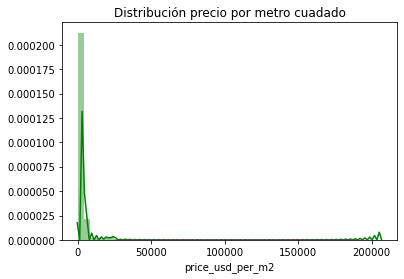

In [78]:
#Distribución original de precio por m2
ax = sns.distplot(data_ap['price_usd_per_m2'], color='g')
ax.set_title('Distribución precio por metro cuadado')

Text(0.5, 1.0, 'Distribución precio por metro cuadado')

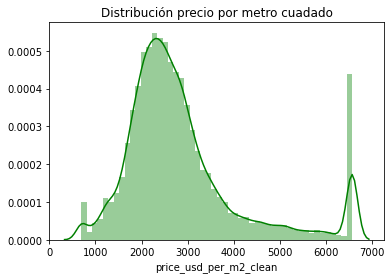

In [79]:
#Distribución nueva de precio por m2
ax = sns.distplot(data_ap['price_usd_per_m2_clean'], color='g')
ax.set_title('Distribución precio por metro cuadado')

<a id="section_floor"></a>
# Depuración columna Floor

Vamos a buscar en la columna "description" todas aquellas líneas que diga "piso" para completar nulos en el campo "floor". En los casos en que el aviso se refiere a varios pisos (Ej. "disponibles segundo, tercer y cuarto piso") tomaremos solo uno de los valores. Procedemos entonces a reemplazar letras por números.

In [70]:
patron="decimo"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("10",x))

patron="noveno"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("9",x))

patron="octavo"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("8",x))

patron="septimo"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("7",x))

patron="sexto"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("6",x))

patron="quinto"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("5",x))

patron="cuarto"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("4",x))

patron="tercero"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("3",x))

patron="segundo"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("2",x))

patron="primero"
regex_patron=re.compile(patron)
data_ap['description_sin_tilde']=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patron.sub("1",x))

#Buscamos también los registros que hagan referencia a la planta baja
patron_pisos_PB="(\splanta\sbaja)"
regex_pisos_PB=re.compile(patron_pisos_PB)
match_PB=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_pisos_PB.search(x))

In [71]:
# Creamos la variable piso_clean indicando como 0 aquellos registros que hagan referencia a una planta baja.

data_ap.loc[match_PB.notnull(),'piso_clean']="0"

print(data_ap['piso_clean'].notnull().sum())
data_ap['piso_clean']

1964


2         NaN
7         NaN
8         NaN
13        NaN
14        NaN
         ... 
121158    NaN
121209    NaN
121215    NaN
121217    NaN
121219    NaN
Name: piso_clean, Length: 24163, dtype: object

In [72]:
#Buscamos los registros que hagan referencia a 4to piso

patron_pisos_1="(\s(?P<piso>\d{1,2})[a-z]{1,2} piso)"
regex_pisos_1=re.compile(patron_pisos_1)

#Completamos la variable piso_clean con la data encontrada

match_1=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_pisos_1.search(x))

data_ap.loc[match_1.notnull(),'piso_clean']=match_1[match_1.notnull()].apply(lambda x: x.group("piso"))
pisos=data_ap[data_ap['piso_clean'].notnull()][['piso_clean']]
print(pisos.shape)

#Buscamos los registros que hagan referencia a 3 piso

patron_pisos_2="(\s(?P<piso>\d{1,2})\spiso)"
regex_pisos_2=re.compile(patron_pisos_2)

#Completamos la variable piso_clean con la data encontrada

match_2=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_pisos_2.search(x))

data_ap.loc[match_2.notnull(),'piso_clean']=match_2[match_2.notnull()].apply(lambda x: x.group("piso"))
pisos=data_ap[data_ap['piso_clean'].notnull()][['piso_clean']]
print(pisos.shape)

# Buscamos los registros que hagan referencia a piso 3

patron_pisos_3="(\spiso\s(?P<piso>\d{1,2}))"
regex_pisos_3=re.compile(patron_pisos_3)

#Completamos la variable piso_clean con la data encontrada

match_3=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_pisos_3.search(x))

data_ap.loc[match_3.notnull(),'piso_clean']=match_3[match_3.notnull()].apply(lambda x: x.group("piso"))
pisos=data_ap[data_ap['piso_clean'].notnull()][['piso_clean']]
print(pisos.shape)

data_ap.loc[data_ap['piso_clean'].notnull(),['piso_clean','floor']]


(2988, 1)
(5777, 1)
(6661, 1)


,piso_clean,floor
2,3,NaN
48,13,NaN
52,10,NaN
97,15,NaN
120,12,12.0
...,...,...
121136,0,NaN
121137,0,NaN
121152,3,NaN
121157,16,NaN


In [73]:
# Unimos la informacion de floor. Si en floor hay datos lo mantenemos, sino completamos con la variable calculada de piso_clean

data_ap['floor_clean'] = data_ap.apply(lambda x: x['floor'] if pd.notnull(x['floor']) else x['piso_clean'], axis=1)

# Chequeamos si en los casos donde había datos en floor se completó correctamente

data_ap.loc[data_ap['floor'].notnull(),['floor','piso_clean','floor_clean']].head()

,floor,piso_clean,floor_clean
120,12.0,12,12
166,6.0,20,6
341,2.0,NaN,2
355,7.0,NaN,7
356,8.0,NaN,8


In [74]:
#Chequeamos si en los casos donde NO había datos en floor se completó correctamente con la informacion nueva.

data_ap.loc[data_ap['floor'].isnull(),['floor','piso_clean','floor_clean']].head()

,floor,piso_clean,floor_clean
2,NaN,3,3
7,NaN,NaN,NaN
8,NaN,NaN,NaN
13,NaN,NaN,NaN
14,NaN,NaN,NaN


In [75]:

print(data_ap['floor'].notnull().sum())
print(data_ap['floor_clean'].notnull().sum())

nulos_con_valor = data_ap['floor_clean'].notnull().sum() - data_ap['floor'].notnull().sum()

print("\nPudimos completar %s nulos ! \n" % nulos_con_valor)

2806
8613

Pudimos completar 5807 nulos ! 



_________________________________________________________________________________________________________

<a id="section_expense"></a>
# Depuración columna expenses

Vamos a buscar el termino "expensas" en la description para poder imputar valores a la columna "expenses" del dataset que tiene un gran porcentaje de nulos.

In [76]:
# En el análisis exploratorio inicial vimos que había datos con poco sentido:

print("el mínimo valor de expensas es %s y carece de sentido" % data['expenses'].min())
print("el máximo valor de expensas es %s y carece de sentido" % data['expenses'].max())

el mínimo valor de expensas es 1.0 y carece de sentido
el máximo valor de expensas es 10001500.0 y carece de sentido


In [77]:
print("Hay %s valores que superan los $300000" % data_ap.loc[data_ap["expenses"]>300000, "expenses"].shape[0])
print("Hay %s valores que no superan los $100" % data_ap.loc[data_ap["expenses"]<100, "expenses"].shape[0])

Hay 2 valores que superan los $300000
Hay 434 valores que no superan los $100


In [78]:
data_ap['expenses_ok'] = data_ap.apply(lambda x: np.NaN if ((x['expenses']>300000) | (x['expenses']<100) ) 
                                       else x['expenses'], axis=1)



In [79]:
#Vemos ahora el resultado de la operación anterior

print("Hay %s valores que superan los $300.000" % data_ap.loc[data_ap["expenses_ok"]>300000,"expenses_ok"].shape[0])
print("Hay %s valores que no superan los $100" % data_ap.loc[data_ap["expenses_ok"]<100,"expenses_ok"].shape[0])



Hay 0 valores que superan los $300.000
Hay 0 valores que no superan los $100


In [81]:
# Busco "sin expensas" para asignar valor 0

regex_expensa= re.compile ("sin expensas")

match_expensa=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_expensa.search(x))

sin_expensa=match_expensa[match_expensa.notnull()].apply(lambda x: x.group(0))

# Transformo todos los "sin expensas" a "0"
sin_expensa_0 = sin_expensa.apply(lambda x: x.replace("sin expensas", "0"))

### Busco los valores que son nulos en "expenses" y no son nulos en "sin_expensa_0"

mask = (sin_expensa_0.notnull()) & (data_ap["expenses"].isnull())
mask.value_counts()



False    24018
True       145
dtype: int64

In [82]:
### Imputo a una la columna "nueva_expensa" los valores de "expenses" y luego los valores encontrados para filas de "expenses" que eran nulas

data_ap.loc[mask, "expenses_ok"] = sin_expensa_0

data_ap['expenses_ok'].isnull().value_counts()


True     18469
False     5694
Name: expenses_ok, dtype: int64

A pesar de imputar algunos valores, la columna sigue teniendo muchos valores nulos

_________________________________________________________________________________________________________

<a id="section_nuevos_datos"></a>
# Nueva información a partir de la columna description

### Estacionamiento

A partir de verificar en el análisis exploratorio inicial del campo description identificamos que la presencia o no de estacionamiento es una cualidad importante. Generamos entonces una nueva columna en la que figure si la propiedad cuenta o no con estacionamiento. Asumimos que siempre que se mencione la palabra cochera, estacionamiento o garage es porque la propiedad cuenta con al menos uno.

In [83]:
patron_cochera = re.compile(r'(?P<cochera>\bcochera\b) | (?P<garage>\bgarage\b) | (?P<estacionamiento>\bestacionamiento\b)', flags=re.I | re.X)
cochera_match = data_ap["description_sin_tilde"].apply(lambda x: None if x is np.NaN else patron_cochera.search(x))

#Si hizo match en la nueva columna "estacionamiento" colocamos "si", sino "no"
data_ap["estacionamiento"] = cochera_match.apply(lambda x: "no" if x is None else "si")

print (data_ap["estacionamiento"].value_counts())

data_ap.head(4)

no    19164
si     4999
Name: estacionamiento, dtype: int64


,property_type,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,price_aprox_usd_clean,surface_total_in_m2_ok,filtro_m2,m2_total_clean,price_usd_per_m2_calc,price_usd_per_m2_clean,piso_clean,floor_clean,expenses_ok,estacionamiento
2,apartment,|Argentina|Capital Federal|Mataderos|,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.00,72000.0,...,72000.0,55.0,NaN,55.0,1309.090909,1309.090909,3,3,NaN,no
7,apartment,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,138000.0,USD,2434941.00,138000.0,...,138000.0,45.0,NaN,45.0,3066.666667,3066.666667,NaN,NaN,NaN,no
8,apartment,|Argentina|Capital Federal|Belgrano|,3436077.0,"-34.5598729,-58.443362",-34.559873,-58.443362,195000.0,USD,3440677.50,195000.0,...,195000.0,65.0,NaN,65.0,3000.000000,3000.000000,NaN,NaN,NaN,no
13,apartment,|Argentina|Capital Federal|Palermo|Palermo Soho|,3430234.0,NaN,NaN,NaN,111700.0,USD,1970890.65,111700.0,...,111700.0,50.0,NaN,50.0,2234.000000,2234.000000,NaN,NaN,NaN,no


In [84]:
# data[data_ap['estacionamiento']=='si'].shape[0]
porcentaje_estacionamiento=data_ap[data_ap['estacionamiento']=='si'].shape[0]/data_ap.shape[0]
print("El %s porciento de los departamentos posee estacionamiento"% (round(porcentaje_estacionamiento*100,2)))

El 20.69 porciento de los departamentos posee estacionamiento


### Espacio exterior

A partir de verificar en el análisis exploratorio inicial del campo description identificamos que la presencia o no de balcón / patio / terraza es también una cualidad importante. Generamos entonces una nueva columna en la que figure si la propiedad cuenta o no con espacio exterior. Asumimos que siempre que se mencione alguno de los términos es porque la propiedad cuenta con al menos uno de ellos.

In [85]:
patron_terraza="terraza"
regex_terraza=re.compile(patron_terraza)

match_terraza=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_terraza.search(x))

data_ap.loc[match_terraza.notnull(),'esp_exterior']=match_terraza[match_terraza.notnull()].apply(lambda x: x.group(0))
data_ap[data_ap['esp_exterior'].notnull()][['esp_exterior']].shape

(5590, 1)

In [86]:
data_ap['esp_exterior']

2             NaN
7             NaN
8             NaN
13        terraza
14            NaN
           ...   
121158        NaN
121209        NaN
121215    terraza
121217    terraza
121219        NaN
Name: esp_exterior, Length: 24163, dtype: object

Ponemos como segundo patrón el balcon para que reemplace a la terraza, porque terraza puede ser "terraza de uso comun"

In [87]:
patron_balcon="balcon"
regex_balcon=re.compile(patron_balcon)

match_balcon=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_balcon.search(x))

data_ap.loc[match_balcon.notnull(),'esp_exterior']=match_balcon[match_balcon.notnull()].apply(lambda x: x.group(0))
data_ap[data_ap['esp_exterior'].notnull()][['esp_exterior']].shape

(14261, 1)

In [88]:
data_ap['esp_exterior'].value_counts()

balcon     12726
terraza     1535
Name: esp_exterior, dtype: int64

Seguimos ahora con el patrón "patio"

In [89]:
patron_patio="patio"
regex_patio=re.compile(patron_patio)

match_patio=data_ap['description_sin_tilde'].apply(lambda x: x if x is np.NaN else regex_patio.search(x))

data_ap.loc[match_patio.notnull(),'esp_exterior']=match_patio[match_patio.notnull()].apply(lambda x: x.group(0))
data_ap[data_ap['esp_exterior'].notnull()][['esp_exterior']].shape

(15269, 1)

In [90]:
data_ap['esp_exterior'].value_counts()

balcon     11850
patio       2089
terraza     1330
Name: esp_exterior, dtype: int64

In [91]:
porcentaje_esp_exterior=data_ap['esp_exterior'].notnull().sum()/data_ap.shape[0]
print("El %s porciento de los departamentos posee algún expacio exterior"% (round(porcentaje_esp_exterior*100,2)))

El 63.19 porciento de los departamentos posee algún expacio exterior


### Amenities / comodidades

A partir de verificar en el análisis exploratorio inicial del campo description identificamos que la presencia o no de algunas características denominadas comunmente "amenities" es también una cualidad importante que posiblemente influya en el precio de las propiedades. Generamos entonces una nueva columna en la que figure si la propiedad cuenta o no con amenities. Asumimos que siempre que se mencione alguno de los términos es porque la propiedad cuenta con al menos uno de ellos.

Los términos de búsqueda a partir del análisis exploratorio realizado serán: lavadero, sum, parrilla, solarium, seguridad y piscina.

In [92]:
#buscamos las palabras identificadas como amenities
patron_ameniti = re.compile(r'(?P<sum>\bsum\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_sum']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_sum']=0

In [93]:
patron_ameniti = re.compile(r'(?P<seguridad>\bseguridad\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_seguridad']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_seguridad']=0

In [94]:
patron_ameniti = re.compile(r'(?P<laundry>\blaundry\b)|(?P<lavadero>\blavadero\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_laundry']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_laundry']=0

In [95]:
patron_ameniti = re.compile(r'(?P<gimnasio>\bgimnasio\b)|(?P<gim>\bgim\b)|(?P<gym>\bgym\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_gimnasio']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_gimnasio']=0

In [96]:
patron_ameniti = re.compile(r'(?P<parrilla>\bparrilla\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_parrilla']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_parrilla']=0

In [97]:
patron_ameniti = re.compile(r'(?P<piscina>\bpiscina\b)|(?P<pileta>\bpileta\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_piscina']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_piscina']=0

In [98]:
patron_ameniti = re.compile(r'(?P<solarium>\bsolarium\b)', flags=re.I | re.X)
mascara_ameniti = data_ap["description_sin_tilde"].str.lower().apply(lambda x: x if x is np.NaN else patron_ameniti.search(x))
data_ap.loc[mascara_ameniti.notnull(),'ameniti_solarium']=1
data_ap.loc[mascara_ameniti.isnull(),'ameniti_solarium']=0

In [99]:
data_ap['amenities']=(data_ap['ameniti_sum'] + data_ap['ameniti_laundry'] + data_ap['ameniti_parrilla'] +
                      data_ap['ameniti_solarium'] + data_ap['ameniti_seguridad'] + data_ap['ameniti_piscina'] + 
                      data_ap['ameniti_gimnasio'])


In [100]:
data_ap['amenities'].value_counts()

0.0    9710
1.0    5763
2.0    2796
3.0    2183
4.0    1900
5.0    1258
6.0     483
7.0      70
Name: amenities, dtype: int64

_________________________________________________________________________________________________________

<a id="section_analisis_final"></a>
# Análisis final del dataset

Luego de depurar e imputar datos, procedemos a hacer una limpieza final del dataset y realizar un análisis exploratorio para ver:

* Cómo se distribuyen por tamaño (m2) y precio en usd los departamentos en los distintos barrios.
* Cómo varían en cuanto a su superficie en función de los distintos barrios.
* Ver si realmente las categorías identificadas como amenities son factores que elevan el precio de la propiedad, o al menos son características de propiedades mas caras.

In [101]:
# Quitamos de "data_ap" todas aquellas columnas auxiliares que se generaron en el proceso de limpieza de datos
# O aquellas columnas originales que fueron reemplazadas por otras con mas información
# Dejamos solo aquellas que nos van a servir para el análisis posterior
data_ap.columns

Index(['property_type', 'place_with_parent_names', 'geonames_id', 'lat-lon',
       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
       'properati_url', 'description', 'title', 'image_thumbnail', 'Pais',
       'Provincia', 'Barrio', 'description_sin_tilde', 'Description_Prices',
       'title_price', 'price_aprox_usd_clean', 'surface_total_in_m2_ok',
       'filtro_m2', 'm2_total_clean', 'price_usd_per_m2_calc',
       'price_usd_per_m2_clean', 'piso_clean', 'floor_clean', 'expenses_ok',
       'estacionamiento', 'esp_exterior', 'ameniti_sum', 'ameniti_seguridad',
       'ameniti_laundry', 'ameniti_gimnasio', 'ameniti_parrilla',
       'ameniti_piscina', 'ameniti_solarium', 'amenities'],
      dtype='object')

In [102]:
# ESTO HAY QUE AJUSTARLO AL FINAL DE TODO CUANDO PODAMOS COMPLETAR TODO LO INCOMPLETO Y VER QUE QUEDA Y QUE NO
columnas_a_quitar = ['property_type', 'place_with_parent_names', 'geonames_id', 'lat-lon',
                       'lat', 'lon', 'price', 'currency', 'price_aprox_local_currency',
                       'price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                       'price_usd_per_m2', 'price_per_m2', 'floor', 'rooms', 'expenses',
                       'properati_url', 'description', 'title', 'image_thumbnail', 'Pais',
                       'Provincia', 'description_sin_tilde', 'Description_Prices',
                       'title_price', 'surface_total_in_m2_ok', 'filtro_m2', 'price_usd_per_m2_calc',
                       'piso_clean', 'floor_clean', 'expenses_ok',
                       'estacionamiento', 'esp_exterior', 'ameniti_sum', 'ameniti_seguridad',
                       'ameniti_laundry', 'ameniti_gimnasio', 'ameniti_parrilla',
                       'ameniti_piscina', 'ameniti_solarium']
apartments = data_ap.drop(columnas_a_quitar, axis = 1)
apartments.head(2)

,Barrio,price_aprox_usd_clean,m2_total_clean,price_usd_per_m2_clean,amenities
2,Mataderos,72000.0,55.0,1309.090909,1.0
7,Belgrano,138000.0,45.0,3066.666667,3.0


In [103]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24163 entries, 2 to 121219
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Barrio                  24163 non-null  object 
 1   price_aprox_usd_clean   22283 non-null  float64
 2   m2_total_clean          20694 non-null  float64
 3   price_usd_per_m2_clean  18965 non-null  float64
 4   amenities               24163 non-null  float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB


### Valor de m2 por Barrio
Veamos cuáles son los barrios con el m2 mas caro, y cuáles con el mas económico

In [104]:
#Promedio de precio por m2 en dólares por barrio
precio_m2_barrio_desc = apartments.pivot_table(index='Barrio', values='price_usd_per_m2_clean'
                                                  , aggfunc=np.mean).round(2).sort_values(
                                                ascending=False, by='price_usd_per_m2_clean')
precio_m2_barrio_asc = apartments.pivot_table(index='Barrio', values='price_usd_per_m2_clean'
                                                 , aggfunc=np.mean).round(2).sort_values(ascending=True, by='price_usd_per_m2_clean')

print("\nTop 5 mas caras:")
print(precio_m2_barrio_desc.head(5))
print("\nTop 5 mas baratas:")
print(precio_m2_barrio_asc.head(5))


Top 5 mas caras:
               price_usd_per_m2_clean
Barrio                               
Puerto Madero                 5662.51
Boedo                         4403.77
San Cristobal                 4077.31
Las Cañitas                   3447.84
Palermo                       3373.81

Top 5 mas baratas:
                   price_usd_per_m2_clean
Barrio                                   
Villa Soldati                     1096.06
Pompeya                           1296.71
Villa Lugano                      1298.87
Villa Real                        1675.06
Parque Avellaneda                 1694.56


###  Media de m2 por barrio
Veamos cuáles son los barrios con mas superficie de media por departamento.


In [105]:
#Superficie por propiedad en venta para ver en qué provincia son mas grandes
mediana_superficie_desc = apartments.pivot_table(index='Barrio', values='m2_total_clean', aggfunc=np.median
                                                ).round(2).sort_values(ascending=False, by='m2_total_clean')
mediana_superficie_asc = apartments.pivot_table(index='Barrio', values='m2_total_clean', aggfunc=np.median
                                               ).round(2).sort_values(ascending=True, by='m2_total_clean')

print("\nTop 5 mas superficie:")
print(mediana_superficie_desc.head(5))
print("\nTop 5 menos superficie:")
print(mediana_superficie_asc.head(5))


Top 5 mas superficie:
               m2_total_clean
Barrio                       
Puerto Madero           120.0
Recoleta                102.0
Villa Real               91.0
Retiro                   89.0
Villa Soldati            88.0

Top 5 menos superficie:
                  m2_total_clean
Barrio                          
Boedo                       30.0
San Cristobal               40.0
Velez Sarsfield             44.0
Villa Santa Rita            44.0
Paternal                    45.0


Al comparar el top 5 de mayor precio por metro cuadrado y el top 5 de menor superficie, vemos algo que nos llama la atención: Los barrios de 'Boedo' y 'San Cristobal' estan en el top 5 de mayor precio por metro cuadrado pero en el top 5 de la menor superficie, lo cual no nos parece lógico. 

###  Cantidad de amenities por Barrio
Veamos cuáles son los barrios con mas cantidad de amenities por departamento.


In [106]:
data_ap['Barrio'].value_counts().head(10)

Palermo          3375
Belgrano         2457
Caballito        1857
Recoleta         1365
Villa Urquiza    1163
Barrio Norte     1036
Flores            946
Villa Crespo      936
Almagro           912
San Telmo         865
Name: Barrio, dtype: int64

### Barrio='Boedo'

In [107]:
data_boedo=data_ap[(data_ap['Barrio']=='Puerto Madero')|(data_ap['Barrio']=='Boedo')]
data_boedo.head(3)

,property_type,place_with_parent_names,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,...,estacionamiento,esp_exterior,ameniti_sum,ameniti_seguridad,ameniti_laundry,ameniti_gimnasio,ameniti_parrilla,ameniti_piscina,ameniti_solarium,amenities
66,apartment,|Argentina|Capital Federal|Boedo|,3436003.0,"-34.6187769485,-58.4026450688",-34.618777,-58.402645,72900.0,USD,1286284.05,72900.0,...,no,balcon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,apartment,|Argentina|Capital Federal|Puerto Madero|,3429760.0,"-34.6114635369,-58.3627451275",-34.611464,-58.362745,550000.0,USD,9704475.00,550000.0,...,si,balcon,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0
252,apartment,|Argentina|Capital Federal|Puerto Madero|,3429760.0,"-34.6194333916,-58.3613734778",-34.619433,-58.361373,1195000.0,USD,21085177.50,1195000.0,...,no,balcon,0.0,1.0,1.0,1.0,1.0,1.0,1.0,6.0


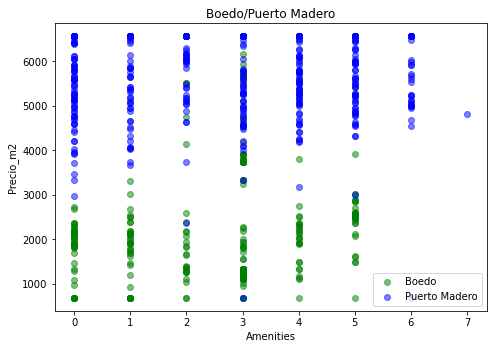

In [108]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_ap.loc[data_ap['Barrio']=='Boedo','amenities'], 
           data_ap.loc[data_ap['Barrio']=='Boedo','price_usd_per_m2_clean'], color='g',alpha=0.5,label='Boedo')
ax.scatter(data_ap.loc[data_ap['Barrio']=='Puerto Madero','amenities'], 
           data_ap.loc[data_ap['Barrio']=='Puerto Madero','price_usd_per_m2_clean'], color='b',alpha=0.5,label='Puerto Madero')
ax.set_xlabel('Amenities')
ax.set_ylabel('Precio_m2')
ax.set_title('Boedo/Puerto Madero')
ax.legend(loc='lower right')
plt.show()

    A partir de este gráfico notamos que la cantidad de amenities no parece ser relevante en el precio del metro cuadrado de la propiedad. Y por otro lado, vemos que otras variables como la ubicación tiene mayor ponderación.

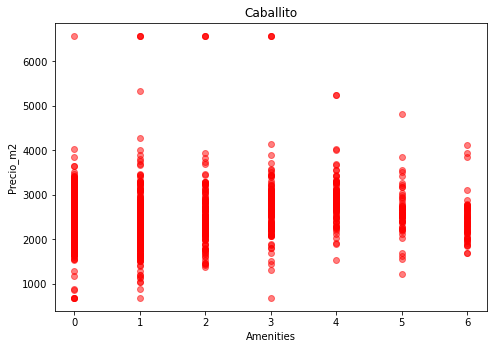

In [109]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_ap.loc[data_ap['Barrio']=='Caballito','amenities'], 
           data_ap.loc[data_ap['Barrio']=='Caballito','price_usd_per_m2_clean'], color='r',alpha=0.5)
# ax.scatter(data_ap.loc[data_ap['Barrio']=='Nuñez','amenities'], 
#            data_ap.loc[data_ap['Barrio']=='Nuñez','price_usd_per_m2_clean'], color='b',alpha=0.5)
ax.set_xlabel('Amenities')
ax.set_ylabel('Precio_m2')
ax.set_title('Caballito')
plt.show()

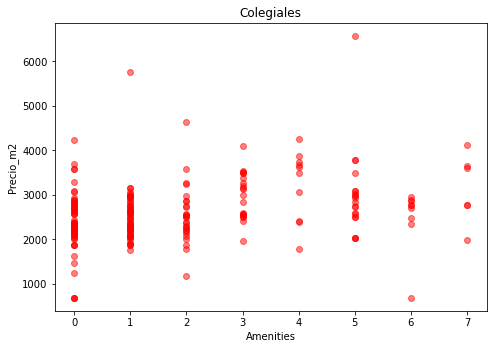

In [110]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_ap.loc[data_ap['Barrio']=='Colegiales','amenities'], 
           data_ap.loc[data_ap['Barrio']=='Colegiales','price_usd_per_m2_clean'], color='r',alpha=0.5)
# ax.scatter(data_ap.loc[data_ap['Barrio']=='Nuñez','amenities'], 
#            data_ap.loc[data_ap['Barrio']=='Nuñez','price_usd_per_m2_clean'], color='b',alpha=0.5)

ax.set_xlabel('Amenities')
ax.set_ylabel('Precio_m2')
ax.set_title('Colegiales')
plt.show()

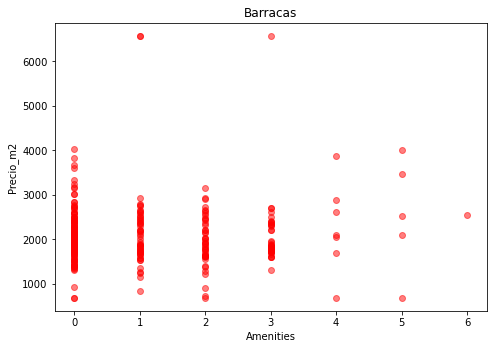

In [111]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(data_ap.loc[data_ap['Barrio']=='Barracas','amenities'], 
           data_ap.loc[data_ap['Barrio']=='Barracas','price_usd_per_m2_clean'], color='r',alpha=0.5)
# ax.scatter(data_ap.loc[data_ap['Barrio']=='Nuñez','amenities'], 
#            data_ap.loc[data_ap['Barrio']=='Nuñez','price_usd_per_m2_clean'], color='b',alpha=0.5)
ax.set_xlabel('Amenities')
ax.set_ylabel('Precio_m2')
ax.set_title('Barracas')
plt.show()

Analizando un barrio de gama mas baja podemos observar que no parece haber una relación positiva entre el precio del metro cuadrado y la cantidad de amenities.

Por otro lado, hay que tener en cuenta que la variable `aminities` es una agrupación de carácteristicas sin distinción de importancia entre si. Quizas si analizamos la relación entre una característica en particular, por ejemplo piscina, y el precio por metro cuadrado podria presentarse una relación diferente a la graficada previamente. 

In [112]:
tabla_resumen = data_ap.pivot_table(index={'Barrio'}, values=['price_usd_per_m2_clean'],\
    aggfunc=np.mean).round(2).sort_values(by='price_usd_per_m2_clean')
tabla_resumen

,price_usd_per_m2_clean
Barrio,
Villa Soldati,1096.06
Pompeya,1296.71
Villa Lugano,1298.87
Villa Real,1675.06
Parque Avellaneda,1694.56
Constitución,1781.68
Catalinas,1833.33
Boca,1868.29
Mataderos,1903.57


In [113]:
cuartiles=pd.DataFrame(data_ap.price_usd_per_m2_clean.describe())
cuartiles

,price_usd_per_m2_clean
count,18965.000000
mean,2859.310834
std,1274.209398
min,691.777217
25%,2082.191781
50%,2550.684932
75%,3184.444444
max,6571.428571


Vamos a separar los barrios en 4 grupos segun el precio por metro cuadrado

In [114]:
tabla_resumen['grupo_barrio']=tabla_resumen.apply(lambda x: 'grupo_75' if x['price_usd_per_m2_clean']>cuartiles.loc['75%','price_usd_per_m2_clean'] else 
                                      ('grupo_50' if x['price_usd_per_m2_clean']>cuartiles.loc['50%','price_usd_per_m2_clean'] else
                                       ('grupo_25' if x['price_usd_per_m2_clean']>cuartiles.loc['25%','price_usd_per_m2_clean'] else 'grupo_0')), axis=1)
tabla_resumen

,price_usd_per_m2_clean,grupo_barrio
Barrio,,
Villa Soldati,1096.06,grupo_0
Pompeya,1296.71,grupo_0
Villa Lugano,1298.87,grupo_0
Villa Real,1675.06,grupo_0
Parque Avellaneda,1694.56,grupo_0
Constitución,1781.68,grupo_0
Catalinas,1833.33,grupo_0
Boca,1868.29,grupo_0
Mataderos,1903.57,grupo_0


### Análisis pendiente:
- Evaluar la correlacion entre el precio por m2 y amenitis por los grupos de cuartiles
- Evaluar la correlación entre el precio por m2 y las otras características nuevas que imputamos a partir de la columna description relacionadas con el espacio de estacionamiento y el espacio exterior al aire libre (Terraza, patio, etc.) o inclusive otros como Floor (Para evaluar si por ej. Planta baja es mas barato que otros pisos)

- Realizar el análisis de amenities pero de manera individualizada (Ej. aquellos que tengan pileta respecto de los que no la tengan, aquellos que tengan seguridad respecto de los que no, etc).

In [115]:
data_ap.to_csv('properati_desafio_final.csv', index=False)
